In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv("/home/sandeepsai/Downloads/Zomato-data.csv")

print("="*60)
print("ZOMATO RESTAURANT DATA ANALYSIS")
print("="*60)


ZOMATO RESTAURANT DATA ANALYSIS


In [7]:
# Basic dataset information
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Dataset info
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe(include='all'))



1. DATASET OVERVIEW
----------------------------------------
Dataset shape: (148, 7)
Columns: ['name', 'online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'listed_in(type)']

First 5 rows:
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147

In [8]:
print("\n2. DATA CLEANING AND PREPROCESSING")
print("-" * 40)

# Clean the rating column
def clean_rating(rating):
    """Extract numeric rating from string format like '4.1/5'"""
    if isinstance(rating, str) and '/' in rating:
        try:
            return float(rating.split('/')[0].strip())
        except ValueError:
            return np.nan
    else:
        return np.nan

# Apply cleaning function
df['rating_numeric'] = df['rate'].apply(clean_rating)

print("Rating column cleaned:")
print(f"Original ratings sample: {df['rate'].head().tolist()}")
print(f"Cleaned ratings sample: {df['rating_numeric'].head().tolist()}")

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['online_order', 'book_table', 'listed_in(type)']:
    print(f"{col}: {df[col].unique()}")

# Create price categories for analysis
def categorize_price(cost):
    """Categorize restaurants by price range"""
    if cost <= 300:
        return 'Budget (≤300)'
    elif cost <= 600:
        return 'Mid-range (301-600)'
    else:
        return 'Premium (>600)'

df['price_category'] = df['approx_cost(for two people)'].apply(categorize_price)

print(f"\nPrice categories created: {df['price_category'].unique()}")



2. DATA CLEANING AND PREPROCESSING
----------------------------------------
Rating column cleaned:
Original ratings sample: ['4.1/5', '4.1/5', '3.8/5', '3.7/5', '3.8/5']
Cleaned ratings sample: [4.1, 4.1, 3.8, 3.7, 3.8]

Unique values in categorical columns:
online_order: ['Yes' 'No']
book_table: ['Yes' 'No']
listed_in(type): ['Buffet' 'Cafes' 'other' 'Dining']

Price categories created: ['Premium (>600)' 'Budget (≤300)' 'Mid-range (301-600)']


In [9]:
print("\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# Basic statistics
print("Dataset Overview:")
print(f"Total restaurants: {len(df)}")
print(f"Average rating: {df['rating_numeric'].mean():.2f}")
print(f"Average cost for two: ₹{df['approx_cost(for two people)'].mean():.2f}")
print(f"Average votes: {df['votes'].mean():.2f}")

# Restaurant type distribution
print("\nRestaurant Type Distribution:")
type_dist = df['listed_in(type)'].value_counts()
print(type_dist)
for rest_type, count in type_dist.items():
    percentage = (count/len(df))*100
    print(f"{rest_type}: {percentage:.1f}%")

# Online ordering analysis
print("\nOnline Ordering Analysis:")
online_stats = df['online_order'].value_counts()
print(online_stats)
online_percentage = (online_stats['Yes'] / len(df)) * 100
print(f"Restaurants with online ordering: {online_percentage:.1f}%")

# Table booking analysis
print("\nTable Booking Analysis:")
booking_stats = df['book_table'].value_counts()
print(booking_stats)
booking_percentage = (booking_stats['Yes'] / len(df)) * 100
print(f"Restaurants with table booking: {booking_percentage:.1f}%")

# Rating distribution
print("\nRating Distribution:")
rating_dist = df['rating_numeric'].value_counts().sort_index()
print(rating_dist)



3. EXPLORATORY DATA ANALYSIS
----------------------------------------
Dataset Overview:
Total restaurants: 148
Average rating: 3.63
Average cost for two: ₹418.24
Average votes: 264.81

Restaurant Type Distribution:
listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64
Dining: 74.3%
Cafes: 15.5%
other: 5.4%
Buffet: 4.7%

Online Ordering Analysis:
online_order
No     90
Yes    58
Name: count, dtype: int64
Restaurants with online ordering: 39.2%

Table Booking Analysis:
book_table
No     140
Yes      8
Name: count, dtype: int64
Restaurants with table booking: 5.4%

Rating Distribution:
rating_numeric
2.6     1
2.8     2
2.9     7
3.0     2
3.1     7
3.2     7
3.3    14
3.4    12
3.5     6
3.6    11
3.7    15
3.8    20
3.9    10
4.0    10
4.1    11
4.2     8
4.3     1
4.4     2
4.6     2
Name: count, dtype: int64


In [10]:
print("\n4. ADVANCED ANALYSIS")
print("-" * 40)

# Online vs Offline comparison
print("Online vs Offline Restaurant Comparison:")
comparison = df.groupby('online_order').agg({
    'rating_numeric': ['mean', 'count', 'std'],
    'approx_cost(for two people)': ['mean', 'median'],
    'votes': ['mean', 'median']
}).round(2)
print(comparison)

# Calculate percentage differences
online_rating = df[df['online_order']=='Yes']['rating_numeric'].mean()
offline_rating = df[df['online_order']=='No']['rating_numeric'].mean()
rating_diff = ((online_rating - offline_rating) / offline_rating) * 100

online_cost = df[df['online_order']=='Yes']['approx_cost(for two people)'].mean()
offline_cost = df[df['online_order']=='No']['approx_cost(for two people)'].mean()
cost_diff = ((online_cost - offline_cost) / offline_cost) * 100

print(f"\nOnline restaurants have {rating_diff:+.1f}% higher ratings")
print(f"Online restaurants are {cost_diff:+.1f}% more expensive")

# Price category analysis
print("\nPrice Category Analysis:")
price_analysis = df.groupby('price_category').agg({
    'rating_numeric': 'mean',
    'votes': 'mean',
    'name': 'count'
}).round(2)
price_analysis.columns = ['avg_rating', 'avg_votes', 'restaurant_count']
print(price_analysis)

# Restaurant type analysis
print("\nAnalysis by Restaurant Type:")
type_analysis = df.groupby('listed_in(type)').agg({
    'rating_numeric': ['mean', 'count'],
    'approx_cost(for two people)': 'mean',
    'votes': 'mean'
}).round(2)
print(type_analysis)

# Correlation analysis
print("\nCorrelation Analysis:")
correlations = df[['rating_numeric', 'votes', 'approx_cost(for two people)']].corr()
print(correlations)

print(f"Rating vs Votes correlation: {df['rating_numeric'].corr(df['votes']):.3f}")
print(f"Rating vs Cost correlation: {df['rating_numeric'].corr(df['approx_cost(for two people)']):.3f}")



4. ADVANCED ANALYSIS
----------------------------------------
Online vs Offline Restaurant Comparison:
             rating_numeric             approx_cost(for two people)         \
                       mean count   std                        mean median   
online_order                                                                 
No                     3.49    90  0.35                      358.89  300.0   
Yes                    3.86    58  0.38                      510.34  500.0   

               votes         
                mean median  
online_order                 
No             75.22   10.5  
Yes           559.00  210.0  

Online restaurants have +10.6% higher ratings
Online restaurants are +42.2% more expensive

Price Category Analysis:
                     avg_rating  avg_votes  restaurant_count
price_category                                              
Budget (≤300)              3.53      53.60                67
Mid-range (301-600)        3.69     399.28            


5. DATA VISUALIZATION
----------------------------------------


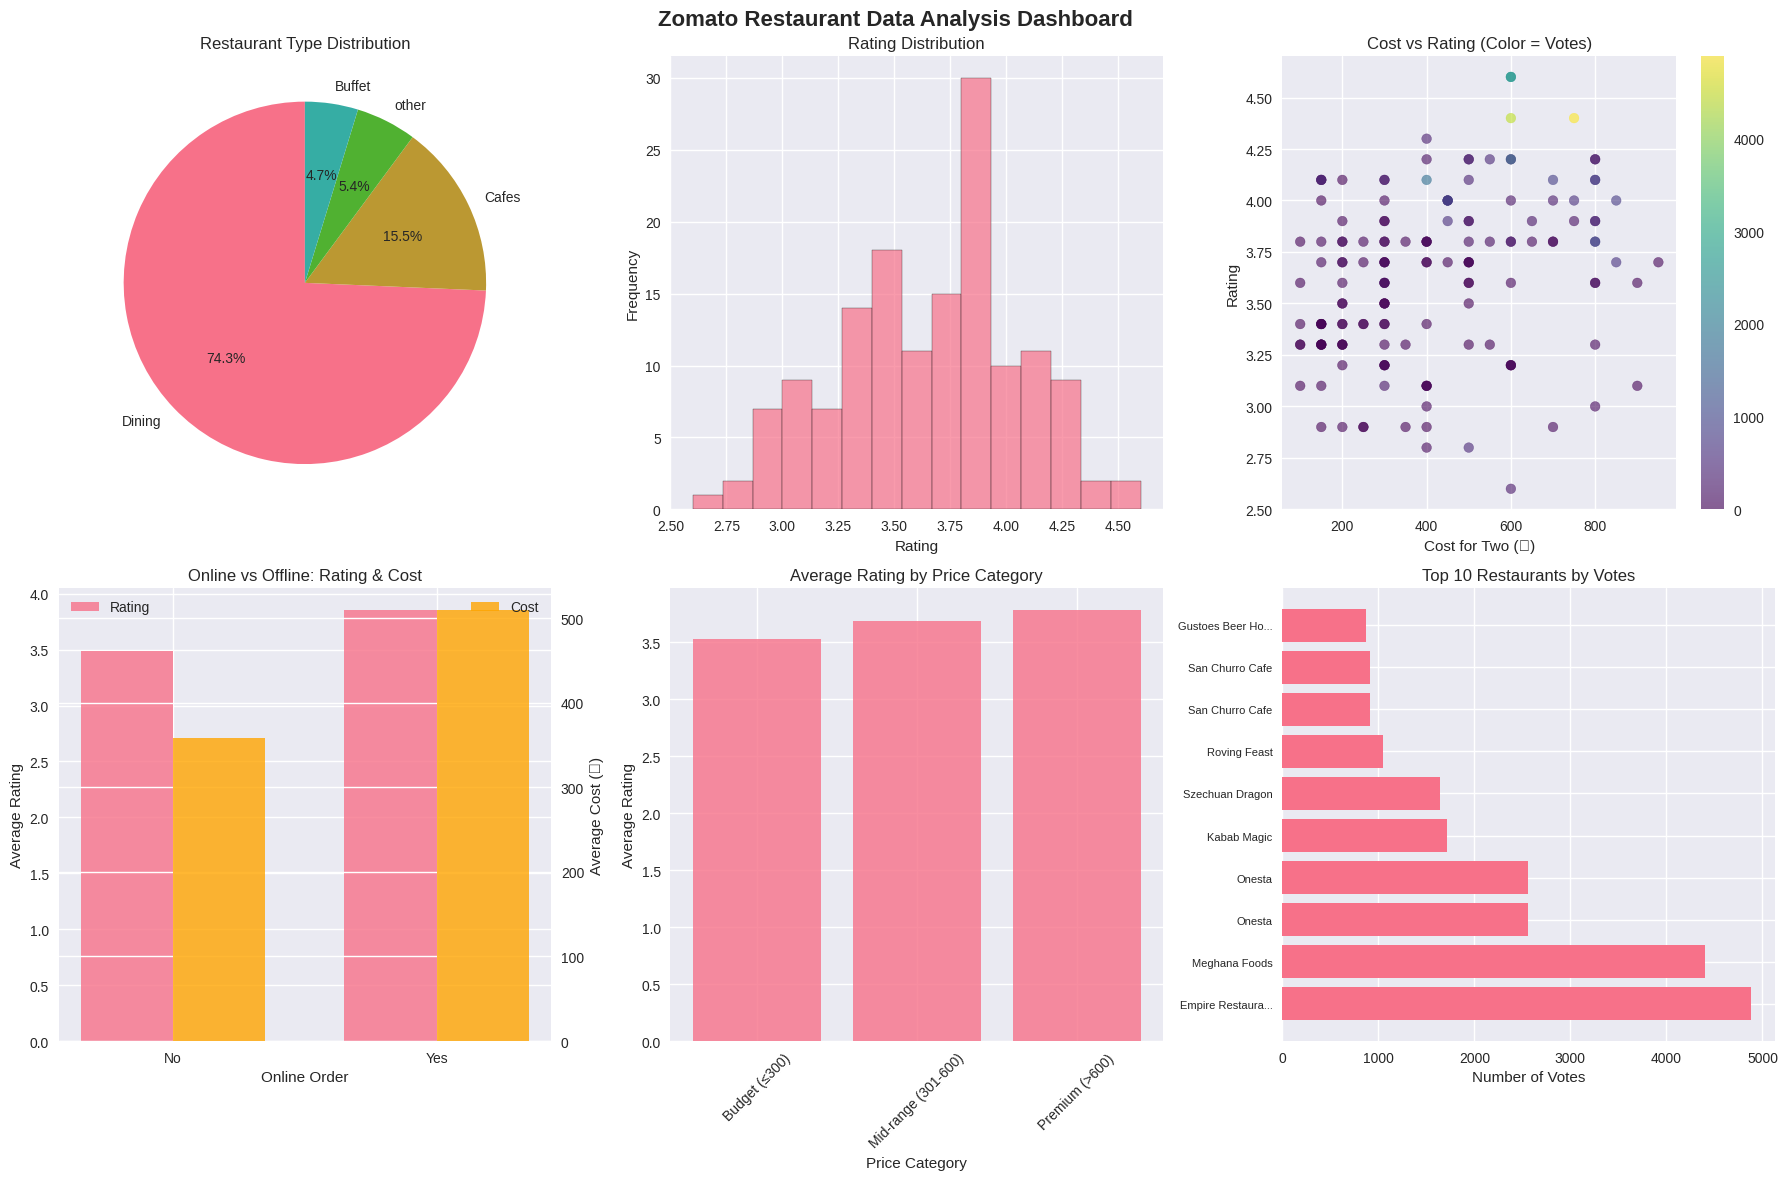

In [11]:
print("\n5. DATA VISUALIZATION")
print("-" * 40)

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Zomato Restaurant Data Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Restaurant type distribution (Pie chart)
type_counts = df['listed_in(type)'].value_counts()
axes[0,0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Restaurant Type Distribution')

# 2. Rating distribution (Histogram)
axes[0,1].hist(df['rating_numeric'], bins=15, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Rating Distribution')
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Frequency')

# 3. Cost vs Rating scatter plot
scatter = axes[0,2].scatter(df['approx_cost(for two people)'], df['rating_numeric'], 
                           c=df['votes'], cmap='viridis', alpha=0.6)
axes[0,2].set_title('Cost vs Rating (Color = Votes)')
axes[0,2].set_xlabel('Cost for Two (₹)')
axes[0,2].set_ylabel('Rating')
plt.colorbar(scatter, ax=axes[0,2])

# 4. Online vs Offline comparison
online_comparison = df.groupby('online_order')[['rating_numeric', 'approx_cost(for two people)']].mean()
x_pos = np.arange(len(online_comparison.index))
width = 0.35

axes[1,0].bar(x_pos - width/2, online_comparison['rating_numeric'], width, 
              label='Rating', alpha=0.8)
ax2 = axes[1,0].twinx()
ax2.bar(x_pos + width/2, online_comparison['approx_cost(for two people)'], width, 
        label='Cost', alpha=0.8, color='orange')
axes[1,0].set_title('Online vs Offline: Rating & Cost')
axes[1,0].set_xlabel('Online Order')
axes[1,0].set_ylabel('Average Rating')
ax2.set_ylabel('Average Cost (₹)')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(online_comparison.index)
axes[1,0].legend(loc='upper left')
ax2.legend(loc='upper right')

# 5. Price category analysis
price_data = df.groupby('price_category')['rating_numeric'].mean()
axes[1,1].bar(price_data.index, price_data.values, alpha=0.8)
axes[1,1].set_title('Average Rating by Price Category')
axes[1,1].set_xlabel('Price Category')
axes[1,1].set_ylabel('Average Rating')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Top restaurants by votes
top_restaurants = df.nlargest(10, 'votes')
axes[1,2].barh(range(len(top_restaurants)), top_restaurants['votes'])
axes[1,2].set_title('Top 10 Restaurants by Votes')
axes[1,2].set_xlabel('Number of Votes')
axes[1,2].set_yticks(range(len(top_restaurants)))
axes[1,2].set_yticklabels([name[:15] + '...' if len(name) > 15 else name 
                          for name in top_restaurants['name']], fontsize=8)

plt.tight_layout()
plt.show()


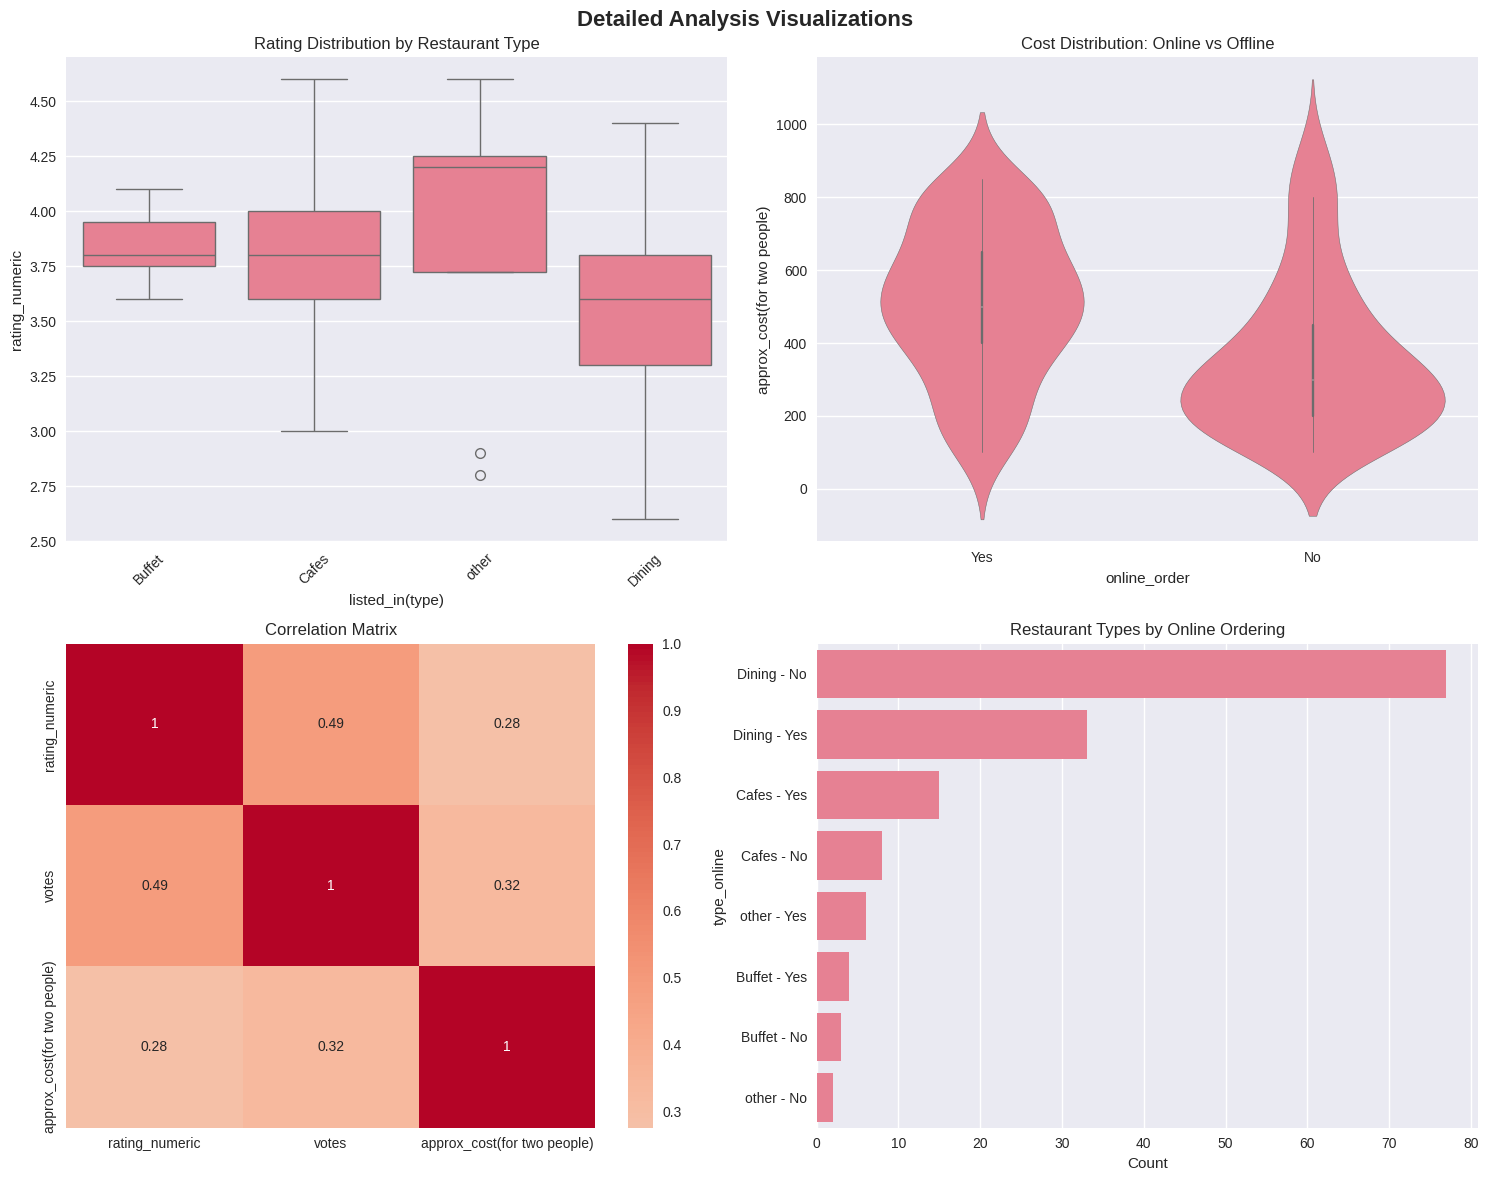

In [12]:
# Create additional detailed visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Detailed Analysis Visualizations', fontsize=16, fontweight='bold')

# 1. Box plot: Rating by restaurant type
sns.boxplot(data=df, x='listed_in(type)', y='rating_numeric', ax=axes[0,0])
axes[0,0].set_title('Rating Distribution by Restaurant Type')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Violin plot: Cost by online ordering
sns.violinplot(data=df, x='online_order', y='approx_cost(for two people)', ax=axes[0,1])
axes[0,1].set_title('Cost Distribution: Online vs Offline')

# 3. Heatmap: Correlation matrix
corr_data = df[['rating_numeric', 'votes', 'approx_cost(for two people)']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=axes[1,0])
axes[1,0].set_title('Correlation Matrix')

# 4. Count plot: Restaurant types with online ordering
df_viz = df.copy()
df_viz['type_online'] = df_viz['listed_in(type)'] + ' - ' + df_viz['online_order']
type_online_counts = df_viz['type_online'].value_counts()
sns.barplot(x=type_online_counts.values, y=type_online_counts.index, ax=axes[1,1])
axes[1,1].set_title('Restaurant Types by Online Ordering')
axes[1,1].set_xlabel('Count')

plt.tight_layout()
plt.show()


In [13]:
print("\n6. KEY INSIGHTS SUMMARY")
print("=" * 60)

# Generate comprehensive insights
insights = []

insights.append("DATASET OVERVIEW:")
insights.append(f"• Total restaurants analyzed: {len(df)}")
insights.append(f"• Average rating: {df['rating_numeric'].mean():.2f}/5.0")
insights.append(f"• Average cost for two: ₹{df['approx_cost(for two people)'].mean():.0f}")
insights.append(f"• Most common type: {df['listed_in(type)'].mode()[0]} ({df['listed_in(type)'].value_counts().iloc[0]} restaurants)")

insights.append("\nRESTAURANT DISTRIBUTION:")
for rest_type, count in df['listed_in(type)'].value_counts().items():
    percentage = (count/len(df))*100
    insights.append(f"• {rest_type}: {count} restaurants ({percentage:.1f}%)")

insights.append("\nDIGITAL PRESENCE:")
online_pct = (df['online_order'].value_counts()['Yes']/len(df))*100
booking_pct = (df['book_table'].value_counts()['Yes']/len(df))*100
insights.append(f"• Online ordering: {online_pct:.1f}%")
insights.append(f"• Table booking: {booking_pct:.1f}%")

insights.append("\nONLINE IMPACT:")
insights.append(f"• Online restaurants rating: {online_rating:.2f}")
insights.append(f"• Offline restaurants rating: {offline_rating:.2f}")
insights.append(f"• Online rating advantage: {rating_diff:+.1f}%")
insights.append(f"• Online cost premium: {cost_diff:+.1f}%")

insights.append("\nTOP PERFORMERS:")
top_rated = df.nlargest(3, 'rating_numeric')
for _, row in top_rated.iterrows():
    insights.append(f"• {row['name']}: {row['rating_numeric']}/5.0 ({row['votes']} votes)")

insights.append("\nCORRELATIONS:")
insights.append(f"• Rating vs Votes: {df['rating_numeric'].corr(df['votes']):.3f}")
insights.append(f"• Rating vs Cost: {df['rating_numeric'].corr(df['approx_cost(for two people)']):.3f}")

# Print all insights
for insight in insights:
    print(insight)

# Save analysis results
results_df = pd.DataFrame({
    'Metric': [
        'Total Restaurants', 'Average Rating', 'Average Cost',
        'Online Ordering %', 'Table Booking %', 'Dining Restaurants',
        'Rating-Votes Correlation', 'Rating-Cost Correlation'
    ],
    'Value': [
        len(df), round(df['rating_numeric'].mean(), 2),
        round(df['approx_cost(for two people)'].mean(), 0),
        round(online_pct, 1), round(booking_pct, 1),
        df['listed_in(type)'].value_counts()['Dining'],
        round(df['rating_numeric'].corr(df['votes']), 3),
        round(df['rating_numeric'].corr(df['approx_cost(for two people)']), 3)
    ]
})

# Save to CSV
results_df.to_csv('zomato_analysis_results.csv', index=False)
print(f"\n📊 Results saved to 'zomato_analysis_results.csv'")
print("📊 Analysis completed successfully!")



6. KEY INSIGHTS SUMMARY
DATASET OVERVIEW:
• Total restaurants analyzed: 148
• Average rating: 3.63/5.0
• Average cost for two: ₹418
• Most common type: Dining (110 restaurants)

RESTAURANT DISTRIBUTION:
• Dining: 110 restaurants (74.3%)
• Cafes: 23 restaurants (15.5%)
• other: 8 restaurants (5.4%)
• Buffet: 7 restaurants (4.7%)

DIGITAL PRESENCE:
• Online ordering: 39.2%
• Table booking: 5.4%

ONLINE IMPACT:
• Online restaurants rating: 3.86
• Offline restaurants rating: 3.49
• Online rating advantage: +10.6%
• Online cost premium: +42.2%

TOP PERFORMERS:
• Onesta: 4.6/5.0 (2556 votes)
• Onesta: 4.6/5.0 (2556 votes)
• Empire Restaurant: 4.4/5.0 (4884 votes)

CORRELATIONS:
• Rating vs Votes: 0.490
• Rating vs Cost: 0.275

📊 Results saved to 'zomato_analysis_results.csv'
📊 Analysis completed successfully!


In [16]:
# Now define your functions
def analyze_specific_type(restaurant_type):
    """Analyze specific restaurant type in detail"""
    subset = df[df['listed_in(type)'] == restaurant_type]
    print(f"\nDetailed Analysis: {restaurant_type} Restaurants")
    print("-" * 40)
    print(f"Count: {len(subset)}")
    print(f"Average Rating: {subset['rating_numeric'].mean():.2f}")
    print(f"Average Cost: ₹{subset['approx_cost(for two people)'].mean():.0f}")
    print(f"Online Ordering: {(subset['online_order'].value_counts().get('Yes', 0)/len(subset)*100):.1f}%")
    
    return subset

def find_best_value_restaurants(max_cost=400, min_rating=3.5):
    """Find restaurants with good rating and reasonable cost"""
    value_restaurants = df[
        (df['approx_cost(for two people)'] <= max_cost) & 
        (df['rating_numeric'] >= min_rating)
    ].sort_values('rating_numeric', ascending=False)
    
    print(f"\nBest Value Restaurants (≤₹{max_cost}, ≥{min_rating} rating):")
    print("-" * 50)
    for _, row in value_restaurants.head(10).iterrows():
        print(f"• {row['name']}: {row['rating_numeric']}/5.0, ₹{row['approx_cost(for two people)']} ({row['votes']} votes)")
    
    return value_restaurants

# Now test the functions
print("Testing the functions:")
analyze_specific_type('Cafes')
best_value = find_best_value_restaurants(400, 3.5)


Testing the functions:

Detailed Analysis: Cafes Restaurants
----------------------------------------
Count: 23
Average Rating: 3.77
Average Cost: ₹546
Online Ordering: 65.2%

Best Value Restaurants (≤₹400, ≥3.5 rating):
--------------------------------------------------
• Corner House Ice Cream: 4.3/5.0, ₹400 (345 votes)
• Frozen Bottle: 4.2/5.0, ₹400 (146 votes)
• The Biryani Cafe: 4.1/5.0, ₹300 (520 votes)
• Shree Cool Point: 4.1/5.0, ₹150 (28 votes)
• Kabab Magic: 4.1/5.0, ₹400 (1720 votes)
• Swathi Cool Point: 4.1/5.0, ₹200 (0 votes)
• Bengaluru Coffee House: 4.1/5.0, ₹300 (201 votes)
• Sri Guru Kottureshwara Davangere Benne Dosa: 4.1/5.0, ₹150 (558 votes)
• Spicy Tandoor: 4.1/5.0, ₹150 (0 votes)
• The Big O Bakes: 4.0/5.0, ₹300 (66 votes)
